In [7]:
# This code is adapted from:
# "A Tutorial on Quantum Dynamics Simulations on Quantum Computers. Part I: Closed Systems"
# by Brandon Allen et al., Yale University, 2024.
# https://cqdmqd.yale.edu/sites/default/files/2024-04/quantum_dynamics_tutorials_PartI_0.pdf

#B. Allen, D. G. A. Cabral, N. P. Vu, C. Cianci, X. Dan, and V. S. Batista, "A Tutorial on Quantum Dynamics Simulations on Quantum Computers. Part I: Closed Systems," Yale University, Apr. 2024. [Online]. Available: https://cqdmqd.yale.edu/sites/default/files/2024-04/quantum_dynamics_tutorials_PartI_0.pdf.

In [1]:
import numpy as np
import scipy.linalg as LA
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.circuit.library import QFT
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info.operators import Operator

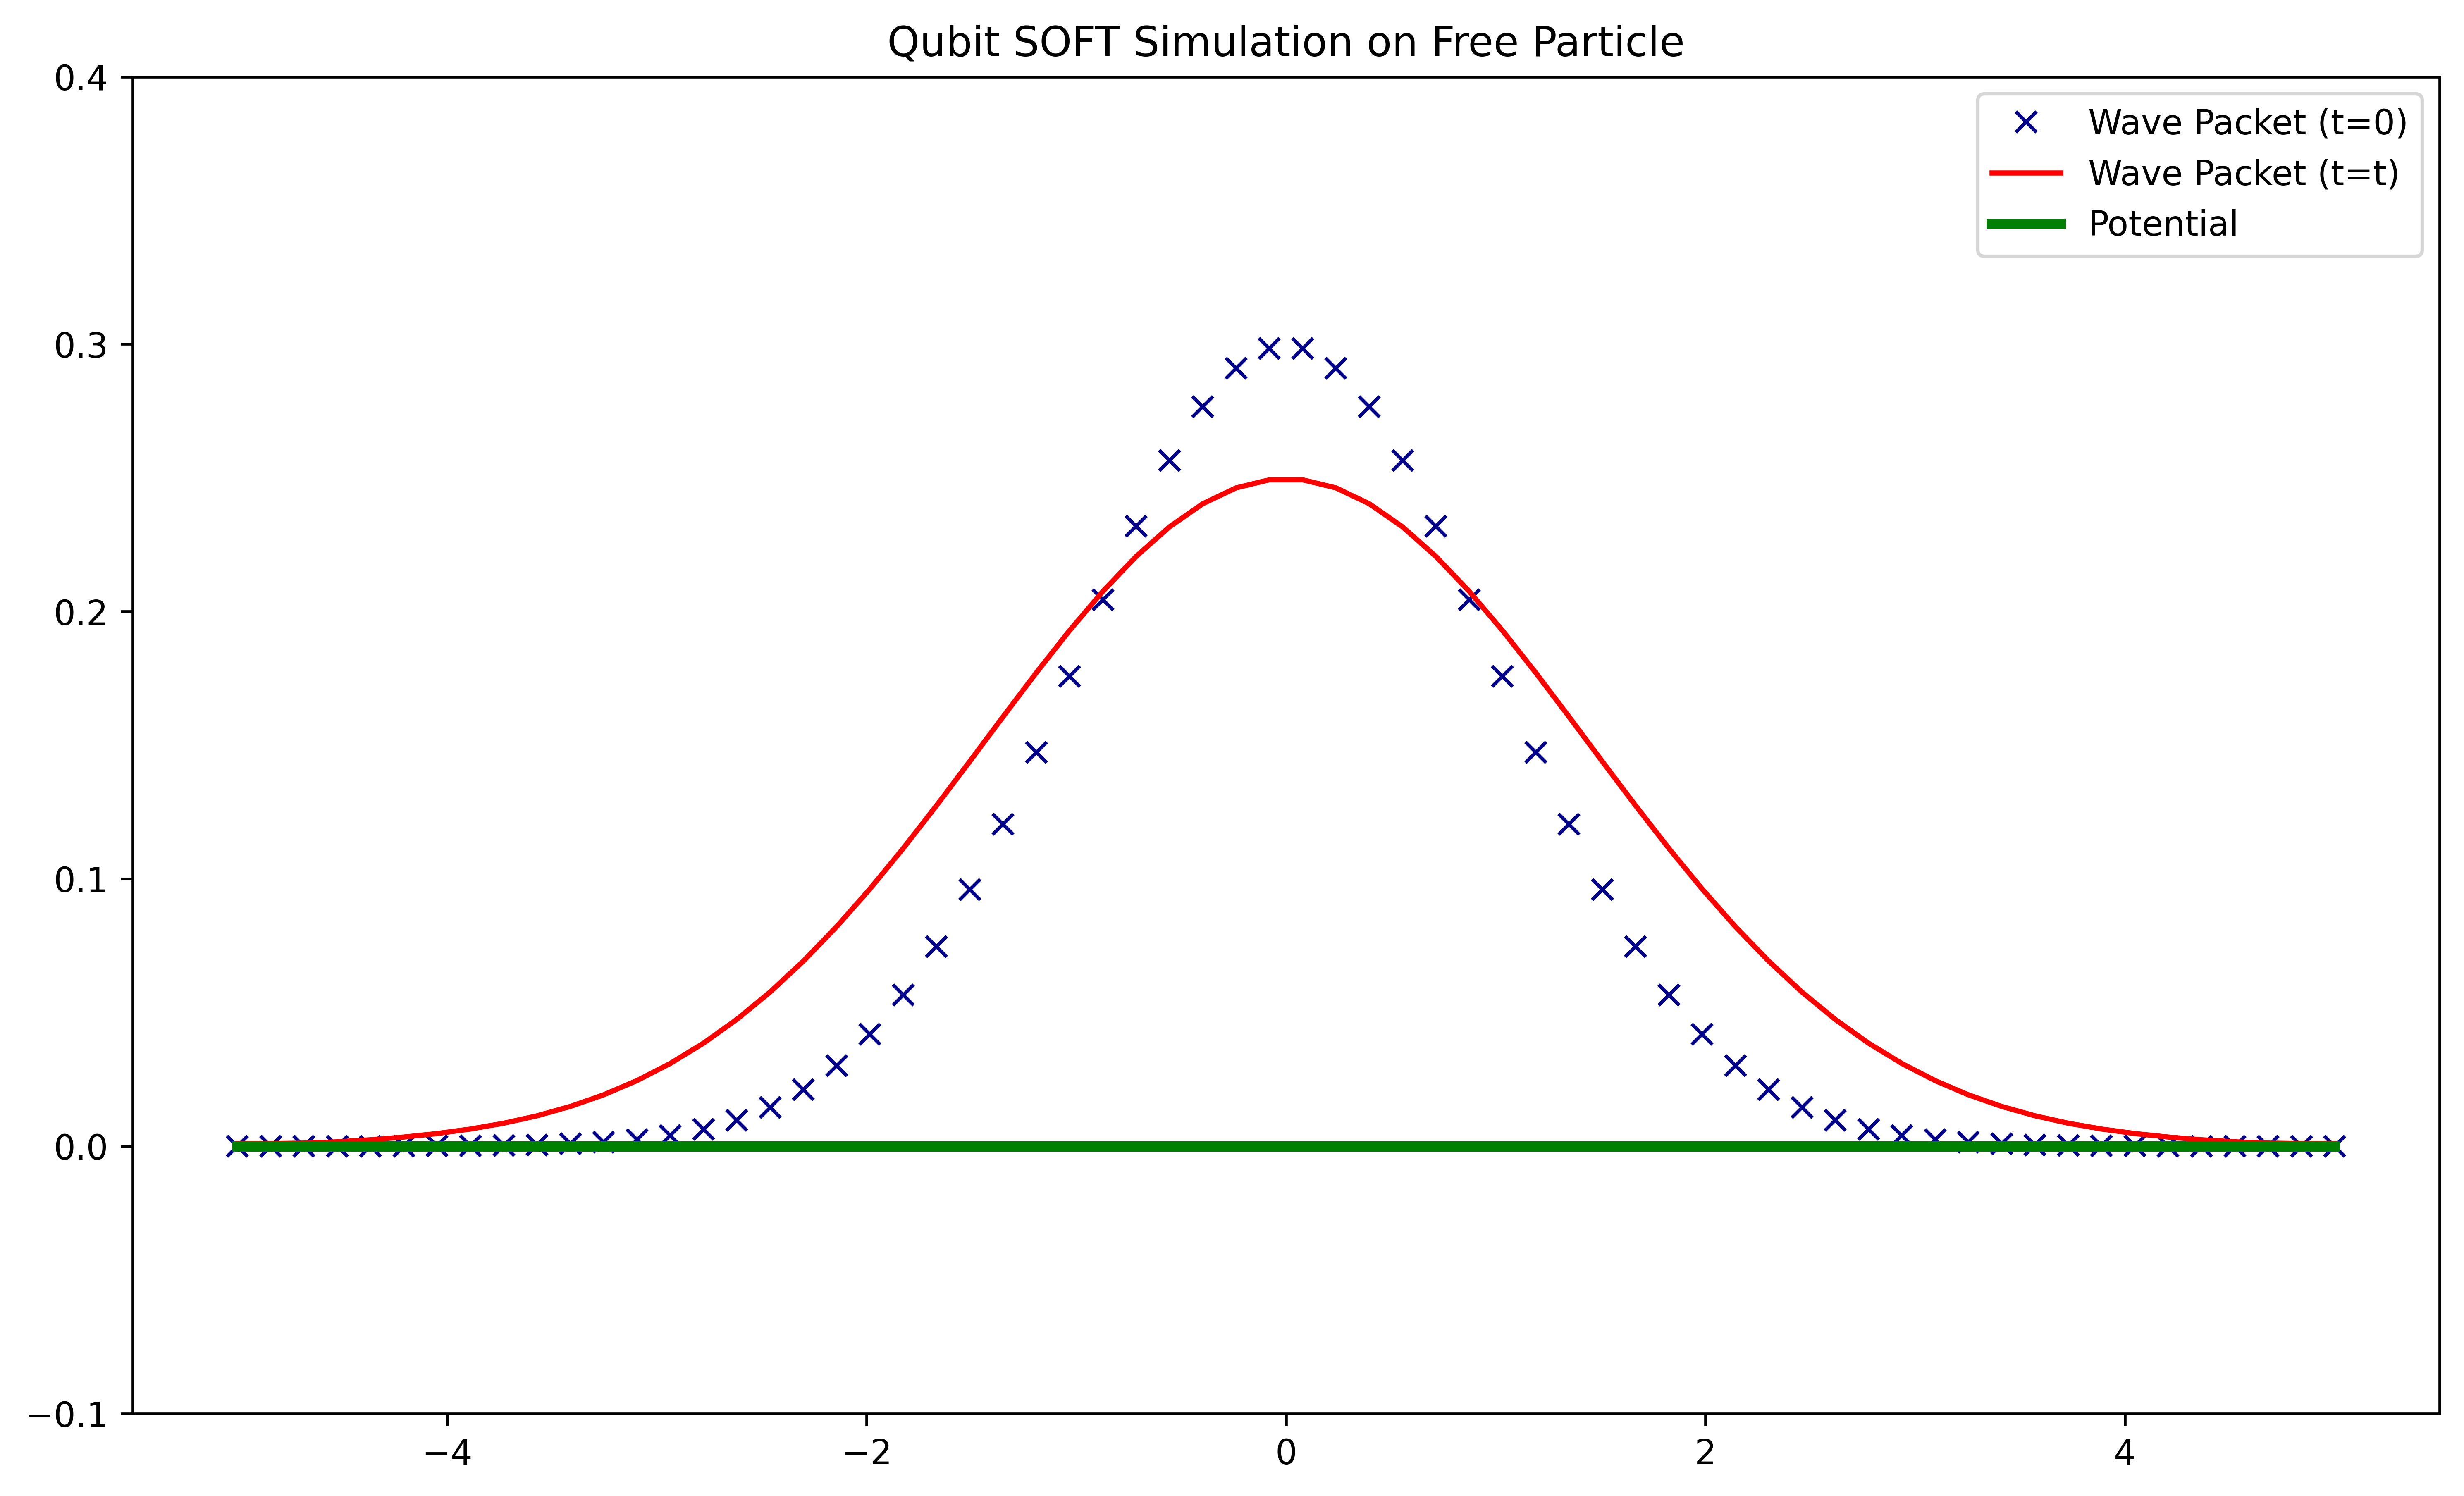

In [4]:
np.set_printoptions(linewidth=110)

d = 6  # number of qubits
mass = 1 #mass of particle
xMin = -5 
xMax = 5
x = np.linspace(xMin, xMax, num=2**d) #bounds of packet/simulation


V = 0*x  #potential well

# Gaussian wavepacket on a grid
mu = 0
alpha = 1
psi = (alpha / np.pi)**(0.25) * np.exp(-alpha * (x - mu)**2 * 0.5)
psi /= np.sqrt(np.sum(np.abs(psi)**2))

# PE and KE operators
dx = (xMax - xMin) / (2**d - 1)
dp = 2 * np.pi / (xMax - xMin)
N = 2**d
p = np.zeros(N, dtype=float)
for i in range(N):
    p[i] = dp * (i - N / 2)
p = np.fft.fftshift(p)

dt = 0.01
iterations = 100

V_prop = np.diag(np.exp(-1j * V * dt))
KE_prop = np.diag(np.exp(-1j * p**2 / 2 / mass * dt))

# Initialize Quantum Circuit
nqubits = d
q_reg = QuantumRegister(nqubits)
c_reg = ClassicalRegister(nqubits)
qc = QuantumCircuit(q_reg)

qc.initialize(psi, q_reg[:])

for k in range(iterations): #iterating through each time
    bound_op = Operator(V_prop) 
    qc.append(bound_op, q_reg)  #applying potential energy operators
    qc.append(QFT(d, do_swaps=True, inverse=True), q_reg)  #quantum fourier transform
    bound_op = Operator(KE_prop) 
    qc.append(bound_op, q_reg) # applying kinetic energy propagators
    qc.append(QFT(d, do_swaps=True, inverse=False), q_reg)  #quantum fourier transform back to potential energy basis


# Save statevector to be recorded later
qc.save_statevector()

# Create the AerSimulator instance
simulator = AerSimulator(method='statevector')

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
sim_result = simulator.run(compiled_circuit).result()

# Get the statevector from the result
psin = sim_result.get_statevector()

# Visualization
plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = [12, 5]

plt.plot(x, abs(psi), 'x', label='Wave Packet (t=0)', color = 'darkblue')
plt.plot(x, np.abs(psin), label='Wave Packet (t=t)', color = 'red')
plt.plot(x, V, linewidth=3, label='Potential', color = 'green')

plt.title('Qubit SOFT Simulation on Free Particle')
plt.legend(loc='upper right')
plt.ylim(-0.1, 0.40)
plt.show()

#do at 0, 100, 200 iterations

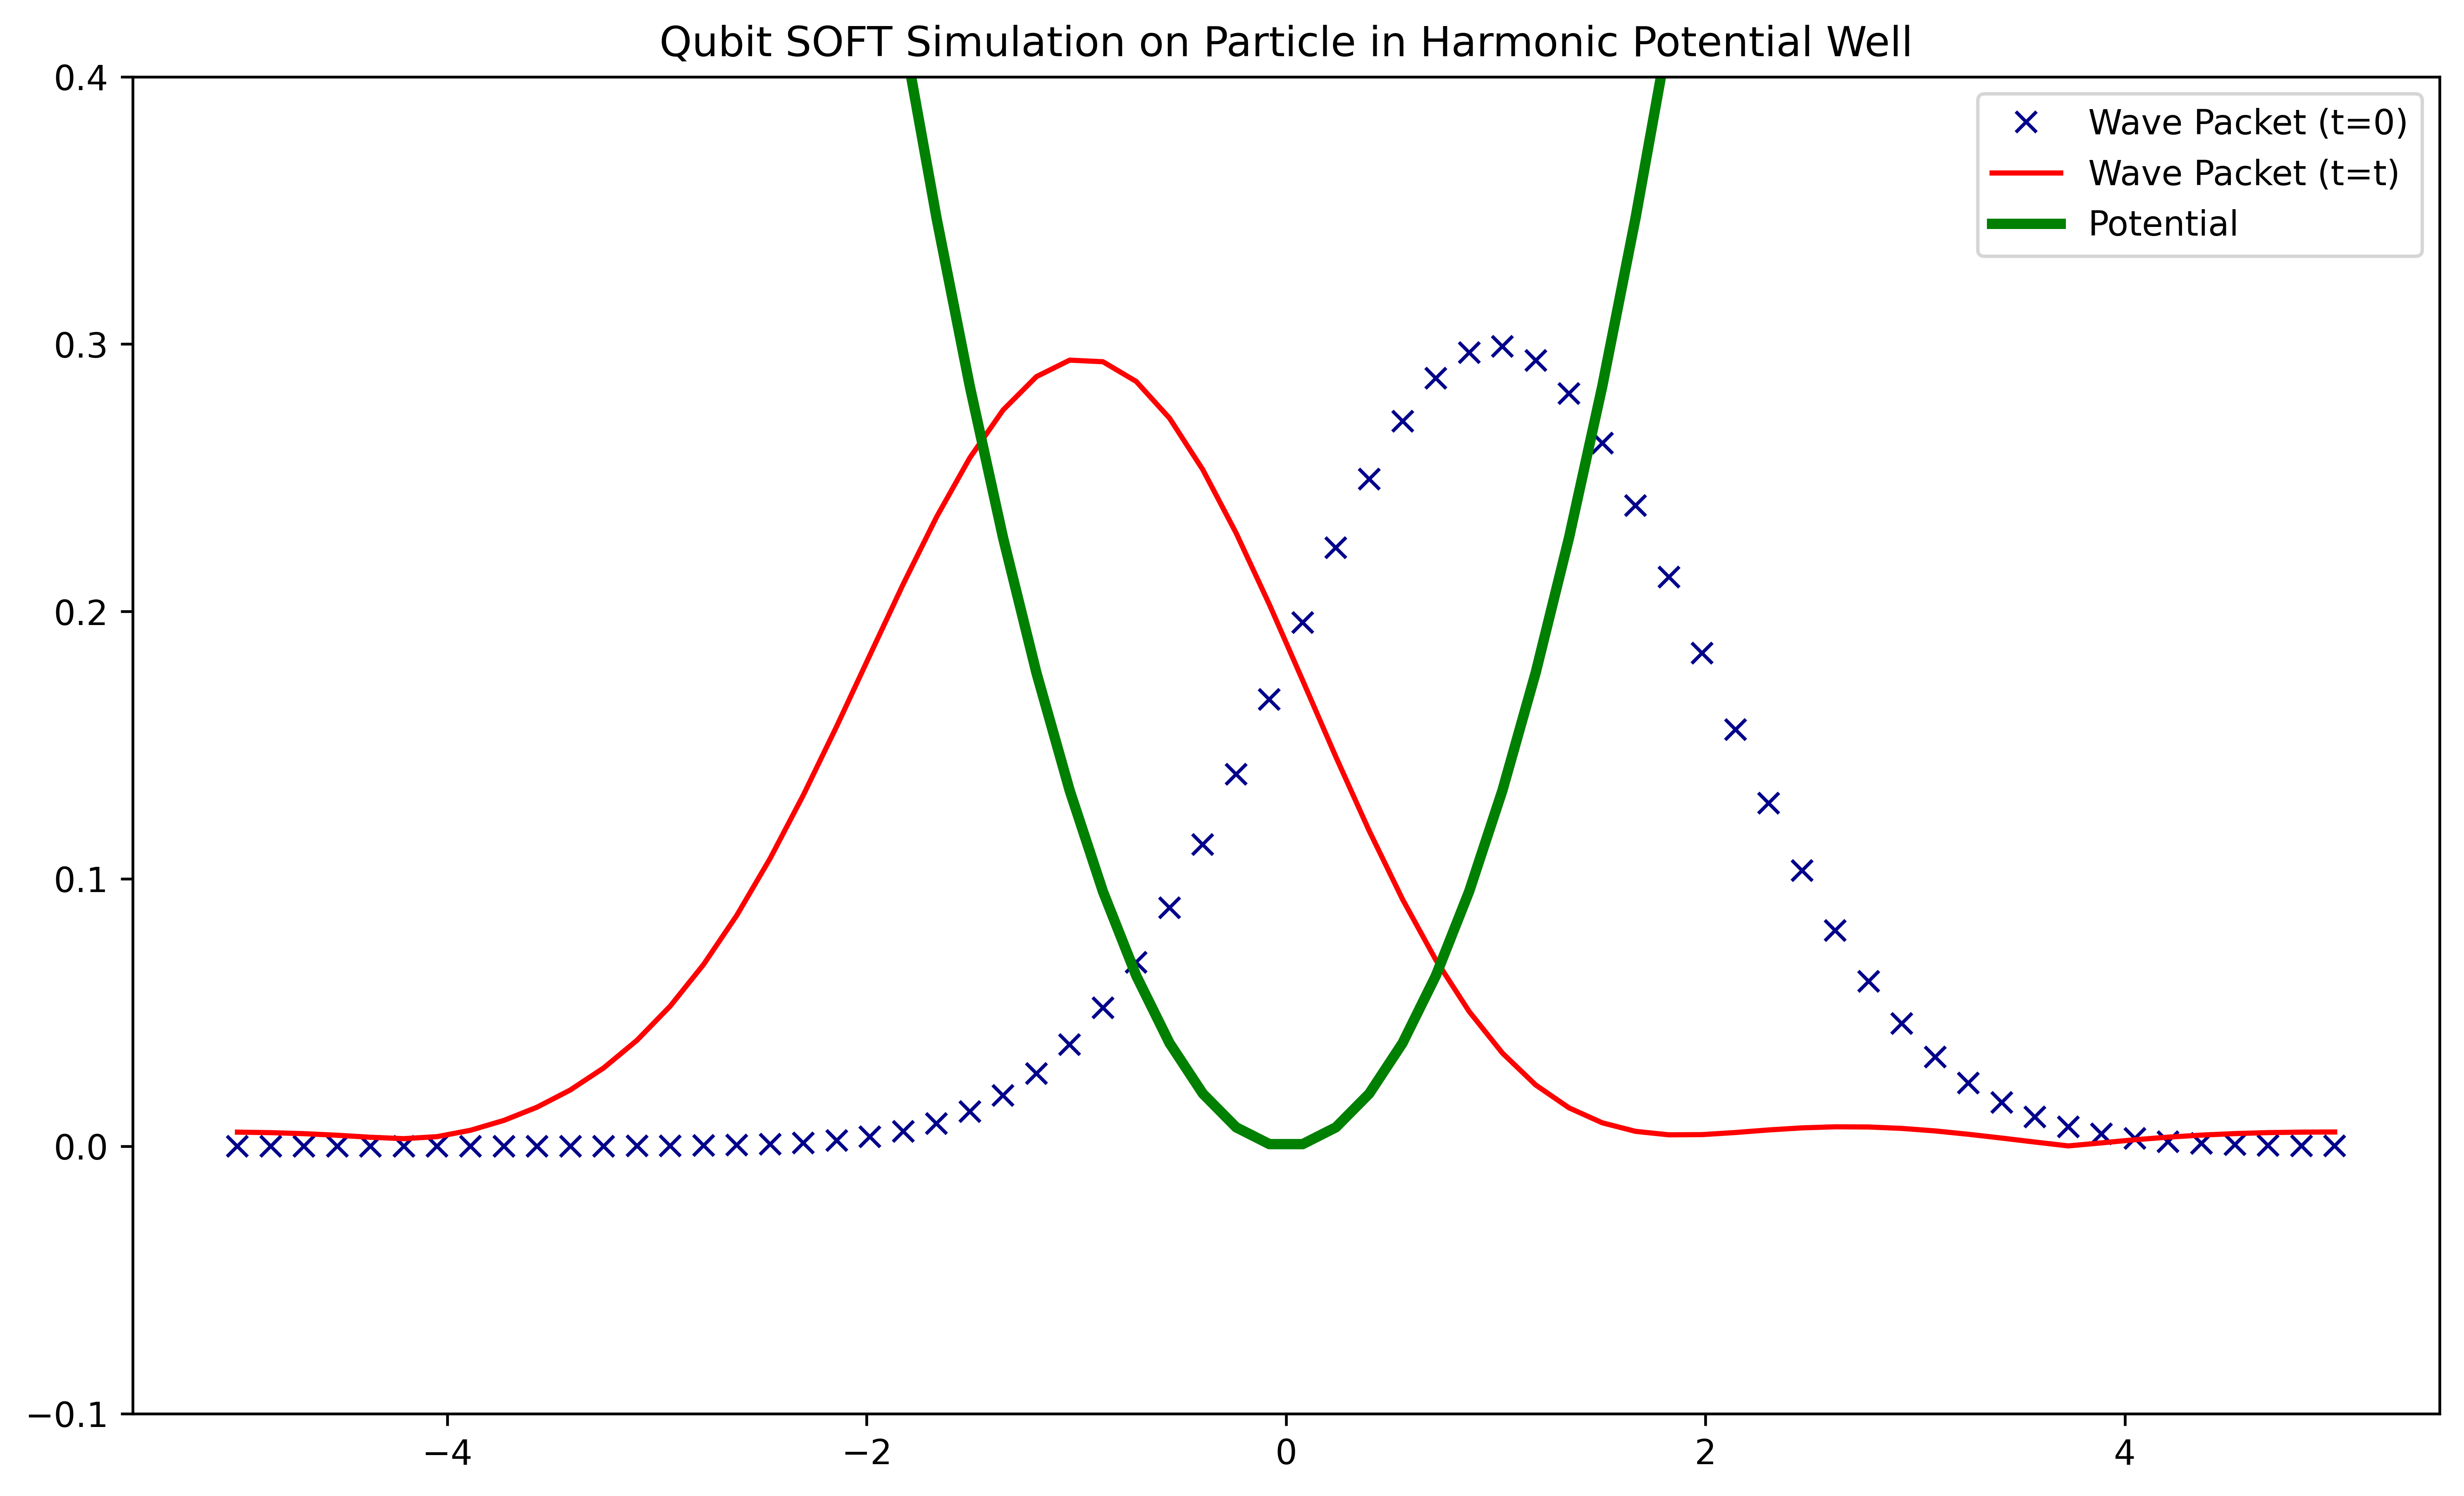

In [6]:
np.set_printoptions(linewidth=110)

d = 6  # number of qubits
mass = 1 #mass of particle
xMin = -5 
xMax = 5
x = np.linspace(xMin, xMax, num=2**d) #bounds of packet/simulation
omega = 0.5


V = 0.5*omega**2 *mass*x**2  #harmonic potential well

# Gaussian wavepacket on a grid
mu = 1
alpha = 1
psi = (alpha / np.pi)**(0.25) * np.exp(-alpha * (x - mu)**2 * 0.5)
psi /= np.sqrt(np.sum(np.abs(psi)**2))

# PE and KE operators
dx = (xMax - xMin) / (2**d - 1)
dp = 2 * np.pi / (xMax - xMin)
N = 2**d
p = np.zeros(N, dtype=float)
for i in range(N):
    p[i] = dp * (i - N / 2)
p = np.fft.fftshift(p)

dt = 0.01
iterations = 600

V_prop = np.diag(np.exp(-1j * V * dt))
KE_prop = np.diag(np.exp(-1j * p**2 / 2 / mass * dt))

# Initialize Quantum Circuit
nqubits = d
q_reg = QuantumRegister(nqubits)
c_reg = ClassicalRegister(nqubits)
qc = QuantumCircuit(q_reg)

qc.initialize(psi, q_reg[:])

for k in range(iterations): #iterating through each time
    bound_op = Operator(V_prop) 
    qc.append(bound_op, q_reg)  #applying potential energy operators
    qc.append(QFT(d, do_swaps=True, inverse=True), q_reg)  #quantum fourier transform
    bound_op = Operator(KE_prop) 
    qc.append(bound_op, q_reg) # applying kinetic energy propagators
    qc.append(QFT(d, do_swaps=True, inverse=False), q_reg)  #quantum fourier transform back to potential energy basis


# Save statevector to be recorded later
qc.save_statevector()

# Create the AerSimulator instance
simulator = AerSimulator(method='statevector')

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
sim_result = simulator.run(compiled_circuit).result()

# Get the statevector from the result
psin = sim_result.get_statevector()

# Visualization
plt.figure(dpi=600)
plt.rcParams["figure.figsize"] = [12, 5]

plt.plot(x, abs(psi), 'x', label='Wave Packet (t=0)', color = 'darkblue')
plt.plot(x, np.abs(psin), label='Wave Packet (t=t)', color = 'red')
plt.plot(x, V, linewidth=3, label='Potential', color = 'green')

plt.title('Qubit SOFT Simulation on Particle in Harmonic Potential Well')
plt.legend(loc='upper right')
plt.ylim(-0.1, 0.40)
plt.show()


#do at 0, 600, 1200 iterations to show oscillations